**You must run this notebook in your local machine to print your credentials**

In [22]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Nalantha Wanasundara') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Nalantha Wanasundara
Local Time: 2024-05-12 18:49:59
Computer ID: DESKTOP-V6T7V8E


In [23]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import geopandas as gpd # GIS
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # plotting data
## Your code down ##
dir_main = "C:\\Users\\nalantha\\Documents\\Palette_Skils\\Stream-3\\Assignment_1\\"
## Your code write up##

In [24]:
# Read datasets I have shared in Slack Channel
df_1=pd.read_csv(dir_main + 'df_1.csv')
df_2=pd.read_csv(dir_main + 'df_2.csv')

## Question 1

**Follow the instructions in slack**


In [25]:
#Remove rows that contain empty cells
df_1_clean = df_1.dropna()
df_2_clean = df_2.dropna()

# Capitalize and remove empty spaces from front and end.
df_1_clean['RM'] = df_1_clean['RM'].astype('str').str.capitalize().str.strip()
df_2_clean['RM'] = df_2_clean['RM'].astype('str').str.capitalize().str.strip()

# Remove duplicates
df_1_clean.drop_duplicates(subset=['RM'],keep='first', inplace=True)
df_2_clean.drop_duplicates(subset=['RM'],keep='first', inplace=True)

# Merge two clean data files
df_final = pd.merge(df_1_clean, df_2_clean,how='outer')

# Print merge dataframe
print(df_final.info())    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      502 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB
None


## Question 2

**Merge Shapefile(provided in Cohort 6 Repo) and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1**

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RM        296 non-null    object  
 1   RMNM      296 non-null    object  
 2   geometry  296 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 9.2+ KB
None


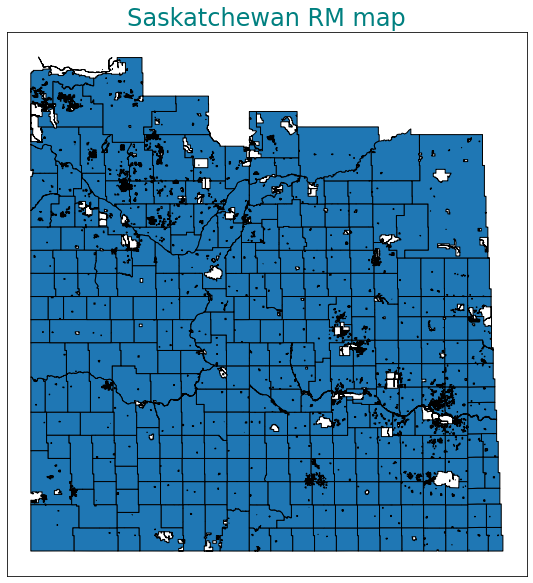

In [26]:
# Reading GIS
dir_GIS = dir_main + "RM_shapefile\\"
gdf_rm=gpd.read_file(dir_GIS + 'RuralMunicipality.shp')
# Selecting geometry data
gdf_rm_clean=gdf_rm[['RMNO', 'RMNM', 'geometry']]
gdf_rm_clean=gdf_rm_clean.to_crs(4326)
# Converting RMNO column type to String
gdf_rm_clean['RMNO']=gdf_rm_clean['RMNO'].astype('int').astype('str').str.strip()
                     
gdf_rm_final=pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_final, on='RM',how='inner')
print(gdf_rm_final.info())

# Creating the map
gdf_rm_final.plot(figsize=[10,10],edgecolor='black')
plt.title('Saskatchewan RM map', color='teal', size=24)
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
plt.show()

Two NORTHERN ADMIN DISTRICT are not in the df_1 and df_2 files. Therefore, only 296 RMs from 298 are selected for the graph.     

<AxesSubplot:title={'center':'Saskatchewan RM map with provincial boundaries'}>

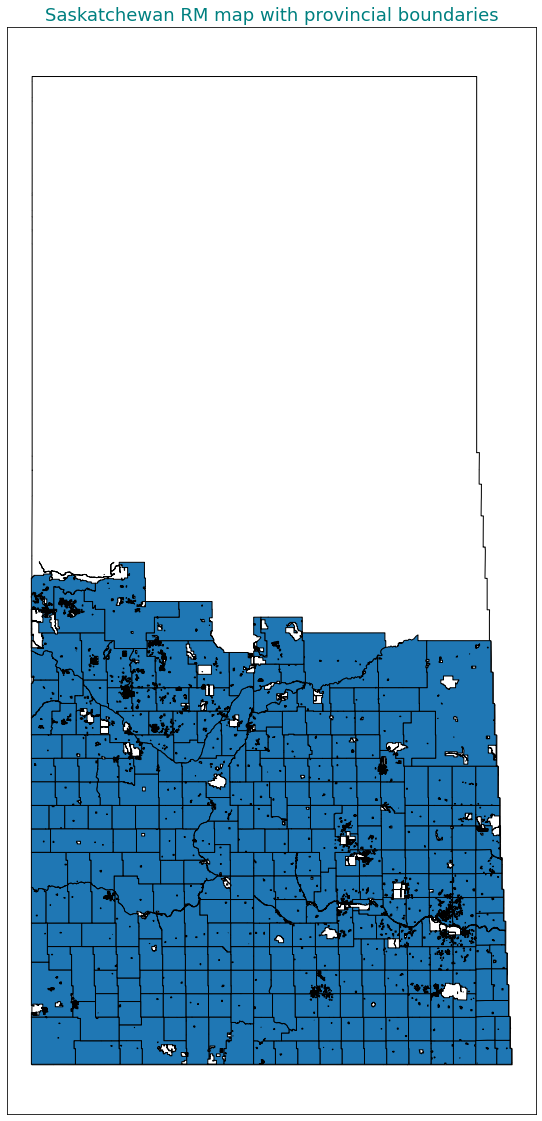

In [27]:
# Reading GIS
dir_province_GIS = dir_main + "Saskatchewan_shapefile\\"
gdf_province_rm=gpd.read_file(dir_province_GIS + 'saskatchewan.shp')
gdf_sask_rm = gdf_province_rm[gdf_province_rm['PRUID']=='47']
gdf_sask_rm=gdf_sask_rm.to_crs(4326)

# create a figure with one subplot
fig , ax = plt.subplots(1,1, figsize=(20, 20))
plt.title('Saskatchewan RM map with provincial boundaries', color='teal', size=18)
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
# plot your background shapefile
gdf_sask_rm.plot(ax=ax,color="white", edgecolor='black')
# plot your foreground shapefile 
gdf_rm_final.plot(ax=ax,edgecolor='black')

In [19]:
gdf_sask_rm.to_file(dir_province_GIS+"saskatchewan.shp", driver='ESRI Shapefile')